# P3:  k-Means Clustering [20 pts]

*K-means* is a classic example of *unsupervised learning*: there is no target that we are trying to predict.  Instead we are trying to extract a hidden structure.  The goal of *k-means* is to find $k$ clusters, or groups, within a dataset.  Each cluster is represented by a point $m$, and the data points that are closest to that point are assigned to the corresponding cluster.  The *means* aspect of the algorithm comes from how these cluster representations are calculated: by computing the mean of the points currently assigned to that cluster.  For more details, read Section *7.3* of Alpaydin. Below I give pseudo-code for the algorithm:

***
* **INPUT**: a data set X (of size NxD), the number of clusters $k$
* Initialize $k$ mean vectors $m_{j}$ (each of size 1xD) to k random data points in X
* Do: 
    * For each data point $x_n$ in $X$:
        * Find the mean $m_{j}$ with the minimum squared distrance to $x_n$: $argmin_{j} \ || x_{n} - m_{j}||^{2}$
        * Assign $x_n$ to the $j$th cluster $C_{j}$, which had the nearest mean $m_j$.
    * For each mean $m_{j}$ for $j \in [1,\ldots, k]$:
        * Re-compute the mean $m_{j}$ by taking the mean of the points currently assigned to cluster $C_{j}$: $m_j = \frac{1}{|C_{j}|}\sum_{x \in C_{j}} x$, where $|C_{j}|$ denotes the number of points currently assigned to cluster $C_{j}$ and the sum is taken over all data points in $C_{j}$.
* While: 
    * Not Converged: The cluster assignments have changed from the previous iteration of the Do-loop.
* **OUTPUT**: the cluster means $\{m_{1},\ldots,m_{k} \}$, the cluster assignments (cluster index per data point)
***
    
This k-means algorithm iteratively minimizes the following global cost function w.r.t. the means $\{m_{1},\ldots,m_{k} \}$: $$ \ell(X, \{m_{1},\ldots,m_{k} \}) = \sum_{j=1}^{k} \sum_{n=1}^{N} 1_{x_{n} \in C_{j}} \cdot || x_{n} - m_{j}||^{2} $$ where $1_{x_{n} \in C_{j}}$ is an indicator function that is one if $x_{n} \in C_{j}$ (meaning that $x_{n}$ is currently assigned to the $j$th cluster) and is zero otherwise. 

If you are still unclear about the ideas, Andrew Ng has a few videos that might be helpful. The notation is a little different, but the ideas are exactly the same:

In [45]:
from IPython.display import YouTubeVideo
from IPython import display

print('Basic description of the algorithm')
display(YouTubeVideo('6u19018FeHg'))
print('Cost function that can be used to check for convergence')
display(YouTubeVideo('omcDeBY4lGE'))
print('Choosing the starting points for the means')
display(YouTubeVideo('wniLibHEE2Y'))

Basic description of the algorithm


TypeError: 'module' object is not callable


## Implementing the algorithm [15 pts]

For your implementation, you'll complete the following components of the k-means algorithm:

* `init_clusters`: Randomly initialize the $k$ means from $k$ random data points [1 pt]
* `distance`: Compute the squared distance between two input points [1 pt]
* `global cost`: Compute the global squared cost $\ell(X, \{m_{1},\ldots,m_{k} \})$ defined above [1 pt]
* `assign_clusters`: Compute the assignments of data points to clusters, based on the current means [4 pts]
* `compute_means`: Compute the (KxD)-matrix containing the mean vectors, based on the current cluster assignments [3 pts]
* `is_converged`: Determine if the algorithm has converged or not by comparing the current cluster assignments with the previous iteration's assignments. [1 pt]
* `run_kmeans`: Combine all of these functions in a general k-means function [4 pts]

In [ ]:
import numpy as np

def init_clusters(x, k):
  # INPUTS: 
  # x -- Nx2 data array
  # k -- integer representing number of clusters
  #
  # OUTPUTS:
  # kx2 array -- the initial mean values, randomly assigned to points in x
  #
  # YOUR SOLUTION HERE
  max_0, max_1 = np.max(x[:, 0]), np.max(x[:, 1])
  maxes = np.array([max_0, max_1])
  means = np.random.rand(k, 2) * maxes

  return means


def distance(x0, x1):
  # INPUTS: 
  # x0 -- 2-dimensional array
  # x1 -- 2-dimensional array
  #
  # OUTPUTS:
  # float -- the squared distance between x0 and x1 
  #
  # YOUR SOLUTION HERE

  return (x0[0] - x1[0]) ** 2 + (x0[1] - x1[1]) ** 2


def global_cost(x, means, assignments):
  # INPUTS: 
  # x -- Nx2 data array
  # means -- kx2 array containing current mean values
  # assignments -- N-dimensional array containing the cluster assignment 
  # index (integer) per data point
  #
  # OUTPUTS:
  # float -- summed cost for all data points, with the distance computed 
  # to their currently assigned mean
  # 
  # YOUR SOLUTION HERE
  N = x.shape[0]
  cost = 0
  for i in range(N):
      # print(assignments[i])
      cost += distance(x[i], means[assignments[i]])
  return cost

def distances_to_means(x0, means):
    k = means.shape[0]
    distances = np.zeros(k)
    for i in range(k):
        distances[i] = distance(x0, means[i])
    return distances

def assign_clusters(x, means):
  # INPUTS: 
  # x -- Nx2 data array
  # means -- kx2 array containing current mean values
  #
  # OUTPUTS:
  # N-dimensional array -- updated cluster assignment index (integer) 
  # per data point
  # 
  # YOUR SOLUTION HERE
  N = x.shape[0]
  k = means.shape[0]
  assignments = np.zeros(N).astype(int)
  for i in range(N):
      # for j in range(k):
    index = np.argmin(distances_to_means(x[i], means))
    assignments[i] = index
  return assignments


def compute_means(x, assignments, k):
  # INPUTS: 
  # x -- Nx2 data array
  # assignments -- N-dimensional array containing the cluster assignment 
  # index (integer) per data point
  # k -- integer representing number of clusters
  #
  # OUTPUTS:
  # kx2 array -- updated mean values
  #
  # HINT #1: The np.where() function might
  # be of help for retrieving cluster members
  #
  # HINT #2: Remember to handle the case
  # in which no points are assigned to a cluster.
  # In that case, set the mean to be a random
  # point in the data (same as how you initialized).
  #
  # YOUR SOLUTION HERE
  means = np.zeros((k, 2))
  for i in range(k):
      cluster_i = x[assignments == i]
      if cluster_i.any():
        means[i, :] = np.mean(cluster_i, axis=0)
      else:
          max_0, max_1 = np.max(x[:, 0]), np.max(x[:, 1])
          maxes = np.array([max_0, max_1])
          m = np.random.rand(2) * maxes
          means[i, :] = m
  return means
    
def is_converged(old_assignments, new_assignments):
  # INPUTS: 
  # old_assignments -- N-dimensional array containing the cluster assignment 
  # index (integer) per data point *obtained by the previous iteration*
  # new_assignments -- N-dimensional array containing the cluster assignment 
  # index (integer) per data point *computed during the current iteration*
  #
  # OUTPUTS:
  # boolean -- true if all elements in the two arrays are equal
  #
  # YOUR SOLUTION HERE

  return np.array_equal(old_assignments, new_assignments)


def run_kmeans(x, k):
  # INPUTS: 
  # x -- Nx2 data array
  # k -- integer representing number of clusters
  #
  # OUTPUTS:
  # means -- kx2 array containing final mean values
  # assignments -- N-dimensional array containing final assignment indices
  # cost_per_iteration -- list containing the global cost for each interation
  if k < 1:
    print("k=%d: Need to run k-Means with k > 0!"%(k))
    return
    
  means = init_clusters(x, k)
  assignments = np.zeros((x.shape[0],)).astype(int)
  assignments = assign_clusters(x, means)
  cost_per_iteration = []
  converged = False
  previous_assignment = np.zeros((x.shape[0],)).astype(int)
  # YOUR SOLUTION STARTS HERE
  while not is_converged(previous_assignment, assignments):
      # print(means)
      # print(assignments)
      cost_per_iteration.append(global_cost(x, means, assignments))
      means = compute_means(x, assignments, k)
      previous_assignment = assignments
      assignments = assign_clusters(x, means)
  # YOUR SOLUTION ENDS HERE
  return means, assignments, cost_per_iteration

## Showing the results

I've provided a function below that will visualize the results of the k-Means algorithm.  It will create two subplots.  One shows the means and cluster assignments of each data point via color-coding.  The second shows the global cost function per iteration of the algorithm.

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.colors as mcolors

# The following plotting function is provided for you.
# INPUTS: 
# x -- Nx2 data array
# means --- Kx2 array with each cluster mean per row
# assignments --- length-N array containg cluster assignment indices
# costs --- list containing global cost for each interation
# OUTPUTS:
# Two plots --- one that shows the color-coded cluster assignments,
# and one that shows the cost per iteration
def plot_clusters_and_cost(x, means, assignments, costs):
    k = means.shape[0]
    
    # there are 17 unique colors in this list, so there'll be an error if 
    # we try to plot more than 17 clusters.
    colors = list(mcolors.TABLEAU_COLORS.keys()) + list(mcolors.BASE_COLORS.keys())[:-1]
    if k > len(colors):
        print("Too many clusters, not enough colors for plotting!")
        print("Try running again with 0 < k <= %d."%(len(colors)))
        return
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    
    # PLOT POINTS & MEANS
    for k_idx in range(means.shape[0]):
        assignment_idxs = np.where(assignments == k_idx)
        ax1.scatter(x[assignment_idxs, 0], x[assignment_idxs, 1], color=colors[k_idx], marker="o", alpha=.3, s=60)
        ax1.scatter(means[k_idx,0], means[k_idx, 1], color=colors[k_idx], marker="x", s=550, linewidth=7)
    ax1.set_title("Clusters (k=%d)"%(means.shape[0]), fontsize=20)
    ax1.set_xlabel(r"$X_1$", fontsize=25)
    ax1.set_ylabel(r"$X_2$", fontsize=25)

    # PLOT GLOBAL COST FUNCTION
    ax2.plot(range(1, len(costs)+1), costs, "k-", lw=5)
    ax2.set_title("Cost Per Iteration", fontsize=20)
    ax2.set_xlabel(r"Iteration", fontsize=25)
    ax2.set_ylabel(r"Cost", fontsize=25)
        
    plt.show()

## Running on Iris data set [3 pts]

Now that k-means is fully implemented, run the algorithm on the Iris dataset from last week.  Like last week, we will use only the last two features: $x_{1}=$**petal length** and $x_{2}=$**petal width**.

In the three code blocks below, run the algorithm for three different values of $k$.  (Choose $k < 18$ or else the plotting function will break.)

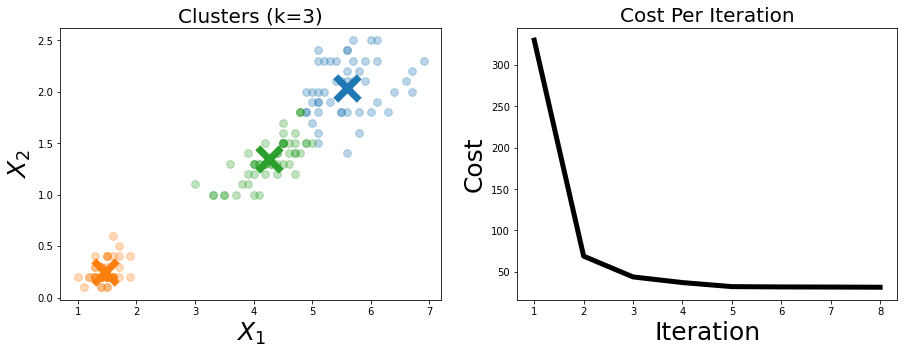

In [62]:
from sklearn import datasets
iris = datasets.load_iris()

iris_two_ft = iris.data[:, 2:4]
k = 3
means, assignments, costs = run_kmeans(iris_two_ft, k)

plot_clusters_and_cost(iris_two_ft, means, assignments, costs)

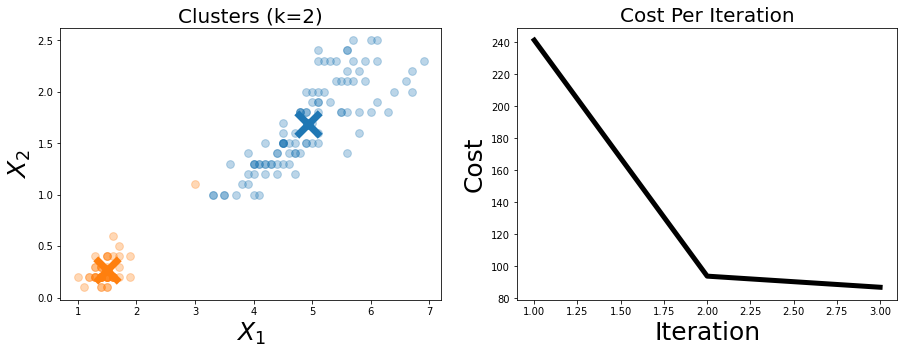

In [59]:
# YOUR SOLUTION HERE
k = 2
means, assignments, costs = run_kmeans(iris_two_ft, k)

plot_clusters_and_cost(iris_two_ft, means, assignments, costs)

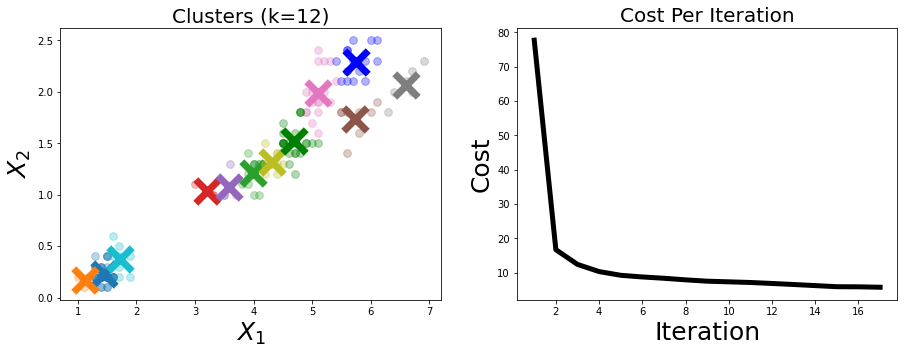

In [47]:
# YOUR SOLUTION HERE
k = 12
means, assignments, costs = run_kmeans(iris_two_ft, k)

plot_clusters_and_cost(iris_two_ft, means, assignments, costs)

## Describe your results [2 pts]

Below, describe what you see in the three different runs.  In particular, describe the changes between runs in (i) the final cluster assignments and (ii) the global cost function.  Do you see evidence of underfitting or overfitting?  If so, describe it.


# ***In terms of the final cluster assignments, running k-means with $k = 2$ seems to be underfitting as the model doesn't have the capacity to capture the structure of the data. $k=12$  is way overfitted as we see that the distinction between classes is marginal (the distance between the means of the classes is small) so we can argue that the model is picking up noise in the data. $k=3$ seems like the right amount of clusters.***
# ***To find the right number of clusters (that won't be underfitting nor overfitting) we can experiment with different values of k and observe that for values up to $k=3$ the global cost (final value) decreases significantly whereas for $k=4$ and higher we don't see a relevant improvement in the global cost final assignment values. That suggests that values under $k=3$ might be underfitting and values over that value of $k$ are overfitting.***